In [577]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as st
from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

In [578]:
train=pd.read_csv('/home/sanju/Desktop/challenges-all/data/loan-pred-data/train.csv')
test=pd.read_csv('/home/sanju/Desktop/challenges-all/data/loan-pred-data/test.csv')

In [579]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [580]:
train.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [581]:
#Property_Area
train.loc[train.Property_Area == "Rural","Property_Area"] = 0
train.loc[train.Property_Area == "Semiurban","Property_Area"] = 1
train.loc[train.Property_Area == "Urban","Property_Area"] = 2
train.Property_Area.value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [582]:
#Education
train.loc[train.Education == "Not Graduate","Education"] = 0
train.loc[train.Education == "Graduate","Education"] = 1
train.Education.value_counts()

1    480
0    134
Name: Education, dtype: int64

In [583]:
#Gender
train.loc[train.Gender == "Female","Gender"] = 0
train.loc[train.Gender == "Male","Gender"] = 1
train.Gender.value_counts()

1    489
0    112
Name: Gender, dtype: int64

In [584]:
#self-emloyed
train.loc[train.Self_Employed == "No","Self_Employed"] = 0
train.loc[train.Self_Employed == "Yes","Self_Employed"] = 1
train.Self_Employed.value_counts()

0    500
1     82
Name: Self_Employed, dtype: int64

In [585]:
#Married?
train.loc[train.Married == "No","Married"] = 0
train.loc[train.Married == "Yes","Married"] = 1
train.Married.value_counts()

1    398
0    213
Name: Married, dtype: int64

In [586]:
#Dependents
train.loc[train.Dependents == "0","Dependents"] = 0
train.loc[train.Dependents == "1","Dependents"] = 1
train.loc[train.Dependents == "2","Dependents"] = 2
train.loc[train.Dependents == "3+","Dependents"] = 3
train.Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [587]:
#loan Amount term
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [588]:
#Credit_history
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [589]:
#Loan Status
train.loc[train.Loan_Status == "N","Loan_Status"] = 0
train.loc[train.Loan_Status == "Y","Loan_Status"] = 1
train.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [590]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [591]:
train[['Gender','Married','Education','Self_Employed','Dependents','Property_Area','Loan_Status']] = train[['Gender','Married','Education','Self_Employed','Dependents','Property_Area','Loan_Status']].apply(pd.to_numeric)        

In [592]:
train.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [593]:
print train.shape

(614, 13)


In [594]:
#removing rows with more than 2 missing values
train = train.dropna(axis = 0,thresh = 12, how = 'any')
print train.shape

(601, 13)


In [595]:
train.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,589.000000,601.000000,591.000000,601.000000,576.000000,601.000000,601.000000,582.000000,589.000000,558.000000,601.000000,601.000000
mean,0.813243,0.648918,0.764805,0.777038,0.138889,5404.632280,1555.169584,145.869416,341.969440,0.840502,1.024958,0.688852
std,0.390048,0.477706,1.015397,0.416580,0.346131,6155.485943,2450.745633,85.681053,64.968274,0.366469,0.788063,0.463349
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2876.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3775.000000,1210.000000,127.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5780.000000,2254.000000,167.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000,2.000000,1.000000


# Bivariate Analysis

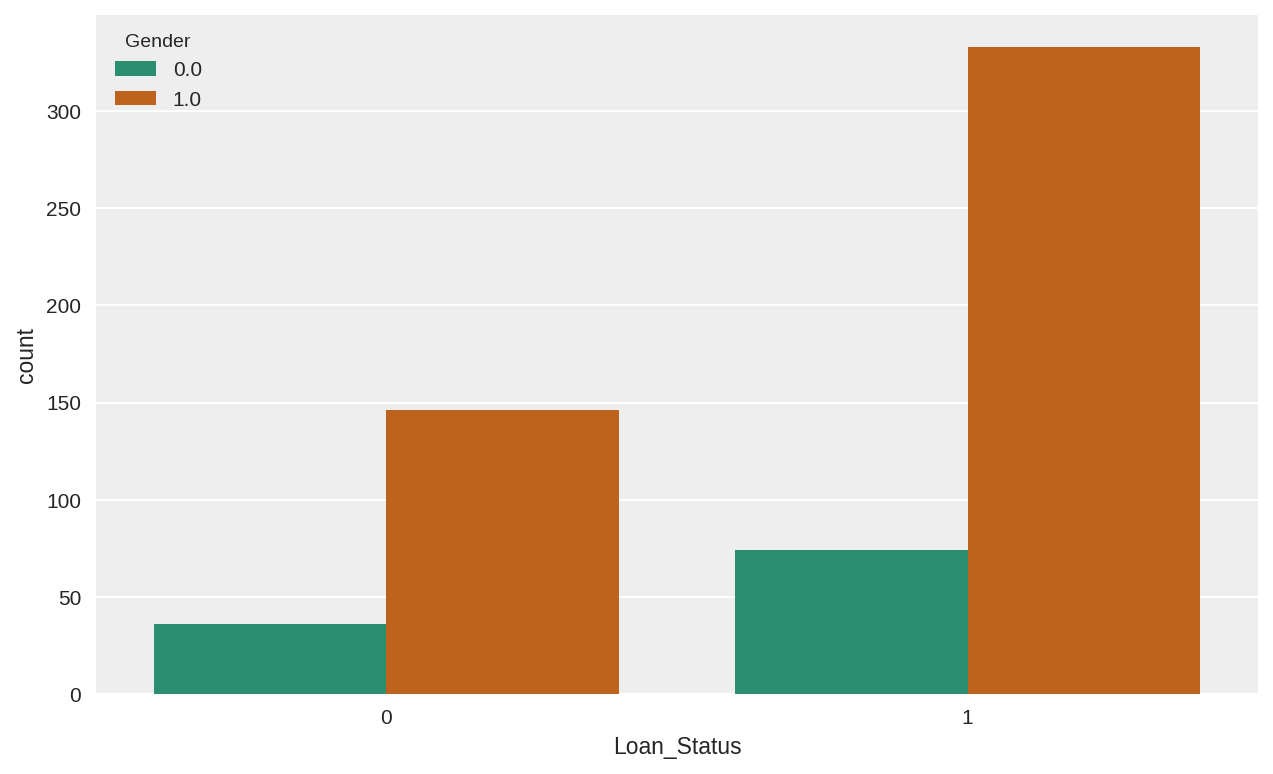

In [596]:
sns.countplot(x = "Loan_Status",data = train,hue = 'Gender')

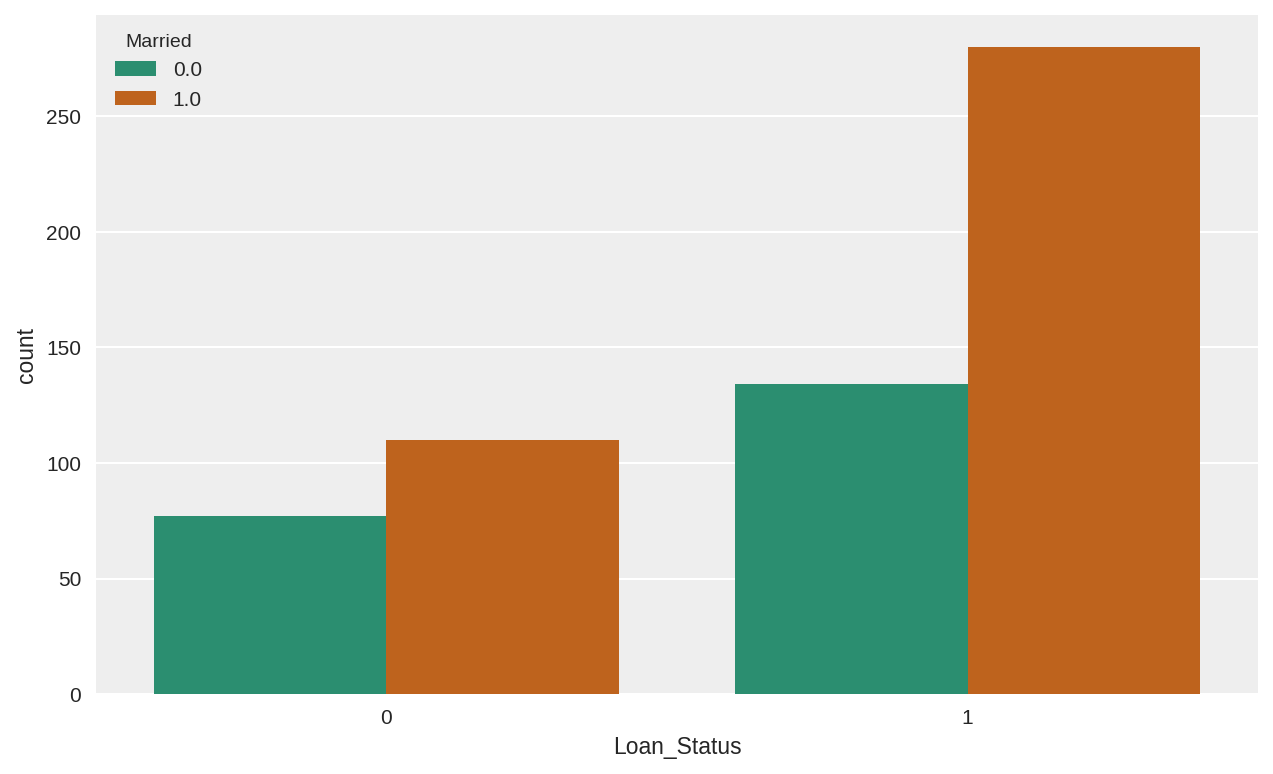

In [598]:
sns.countplot(x = "Loan_Status",data = train,hue = 'Married')

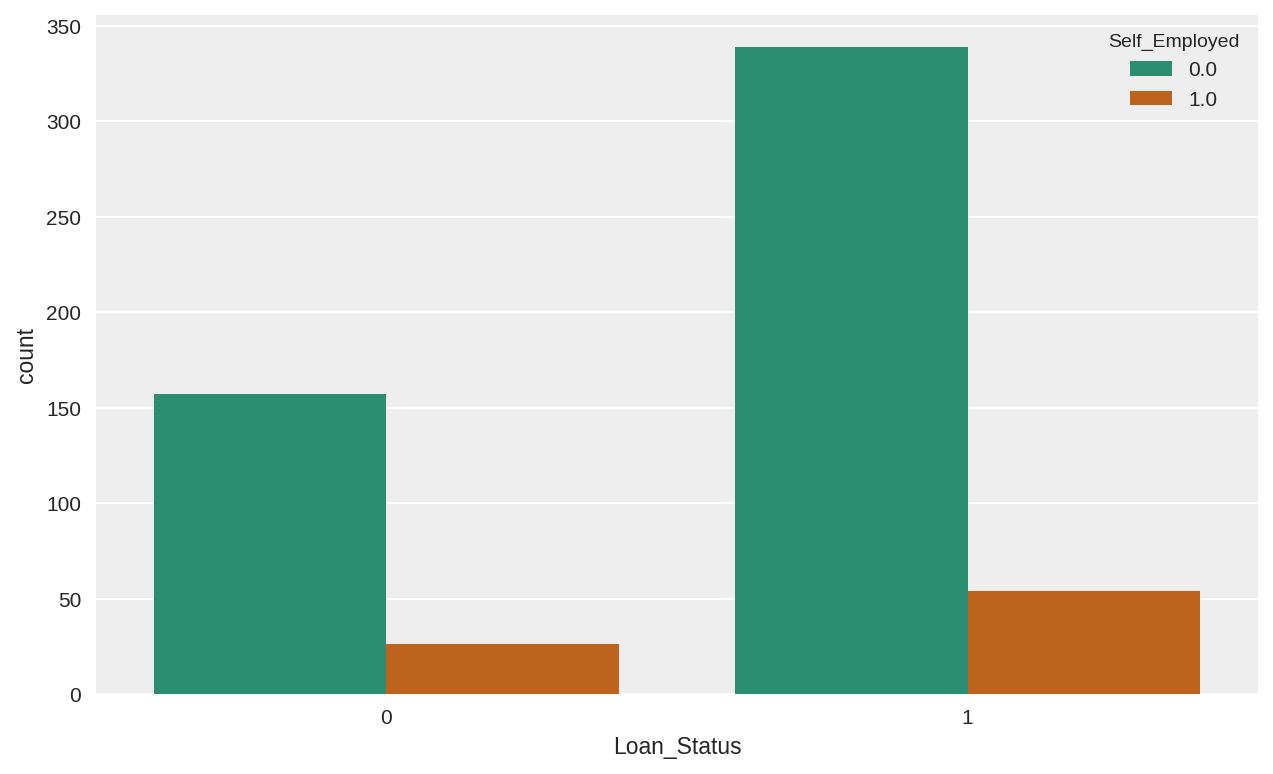

In [604]:
sns.countplot(x = "Loan_Status",data = train,hue = 'Self_Employed')

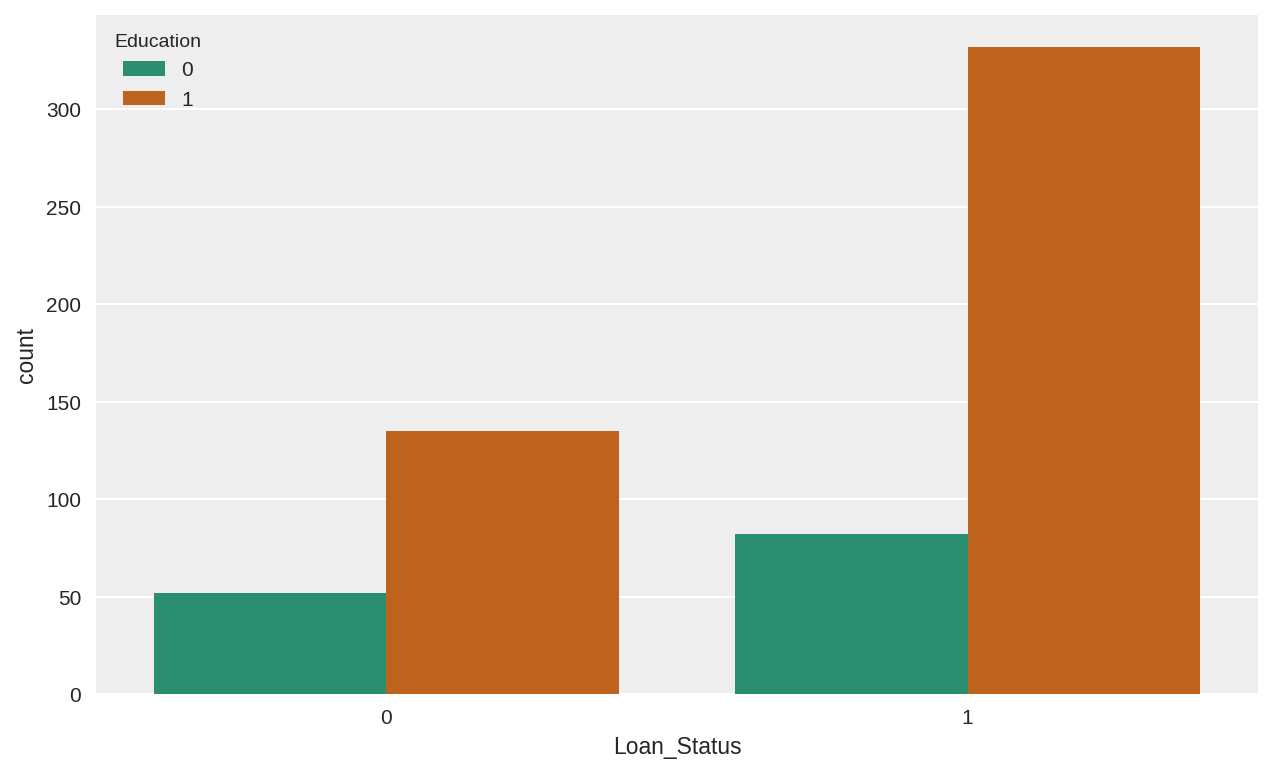

In [605]:
sns.countplot(x = "Loan_Status",data = train,hue = 'Education')

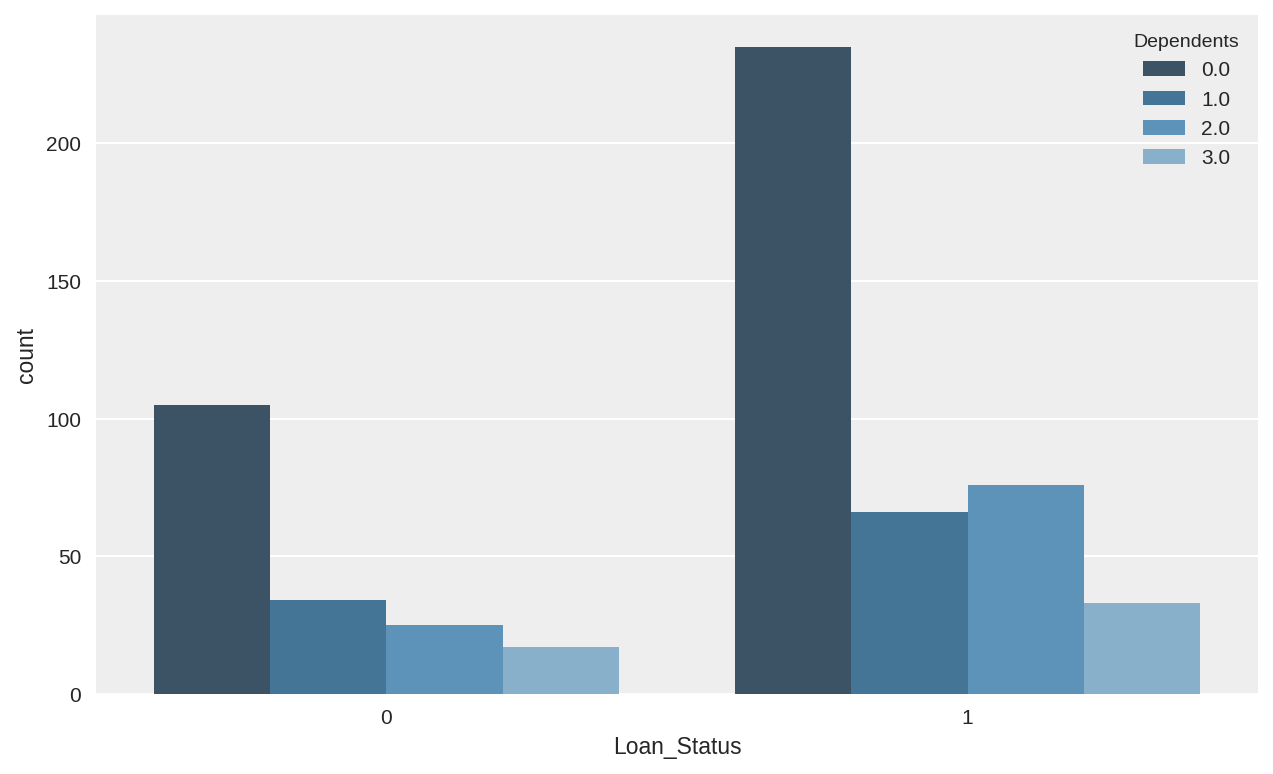

In [606]:
sns.countplot(x = "Loan_Status",data = train,hue = 'Dependents',palette="Blues_d")

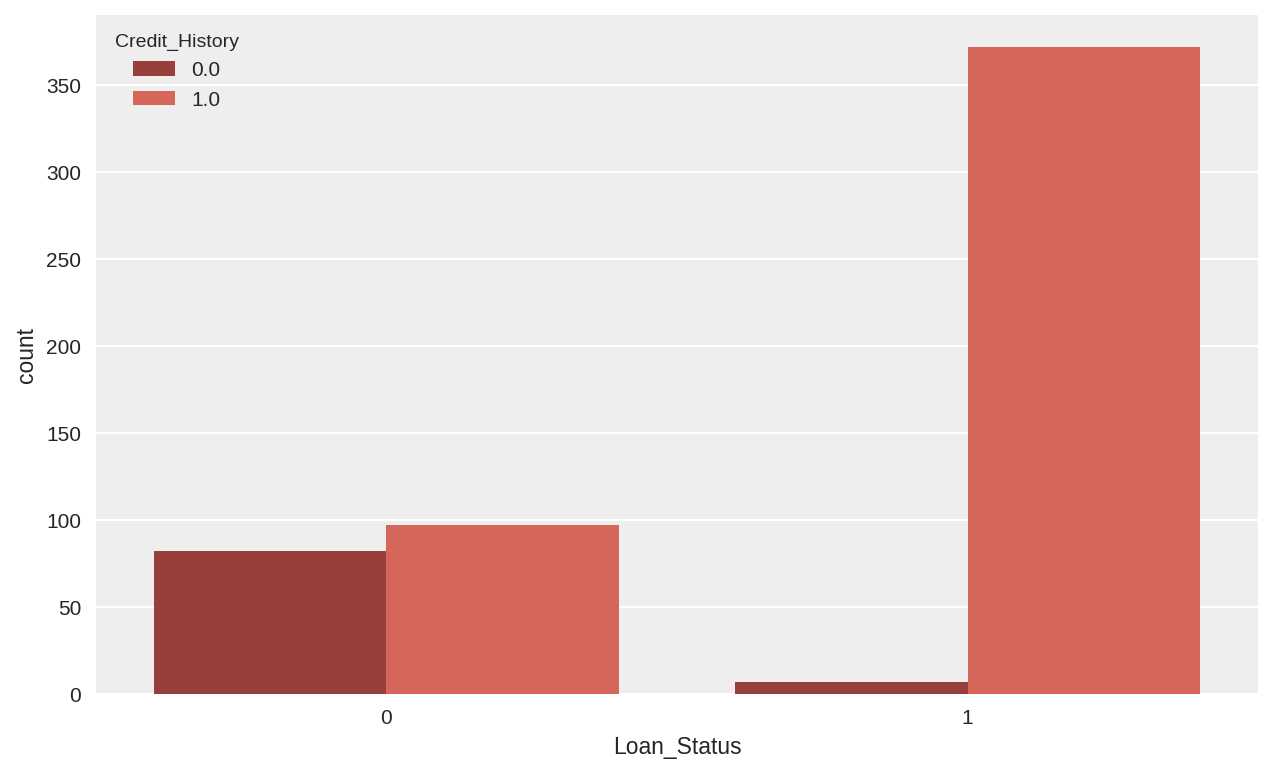

In [607]:
sns.countplot(x = "Loan_Status",data = train,hue = 'Credit_History',palette="Reds_d")

#### We can observe if credit history is poor loan is not sanctioned / loan_status is no.

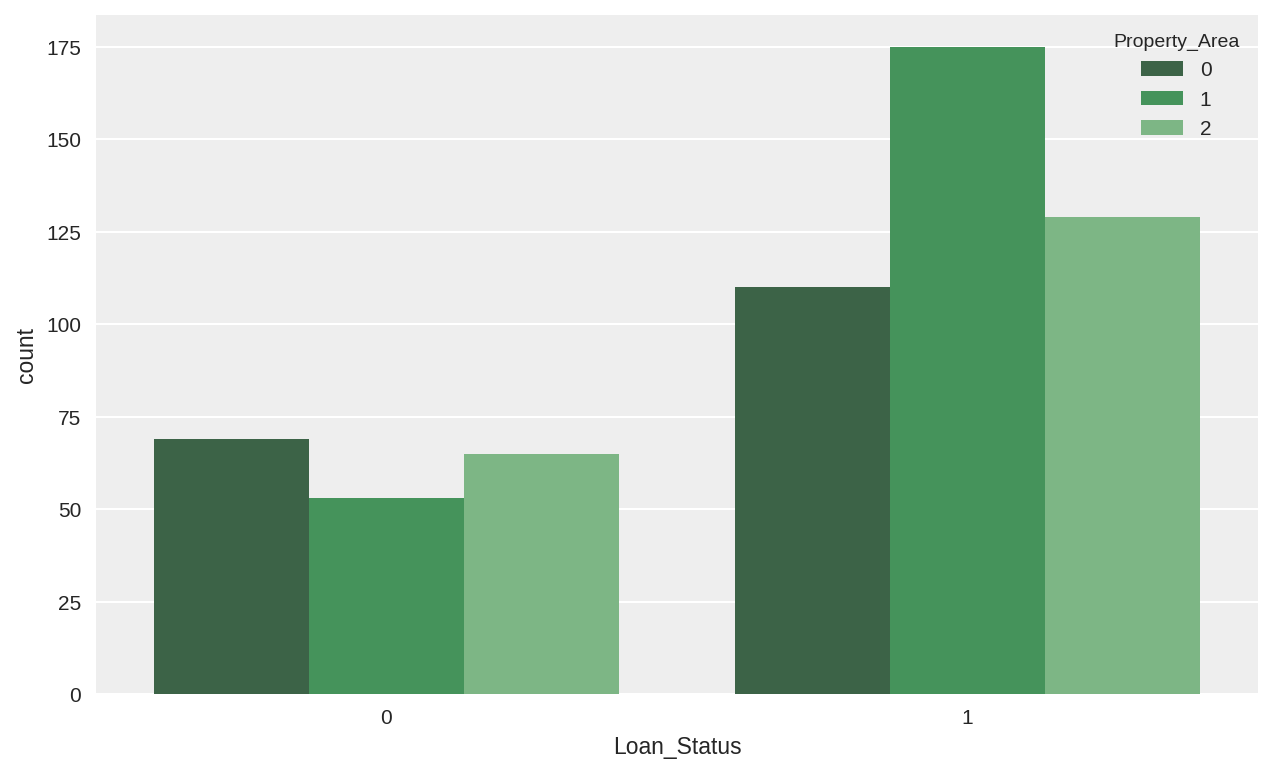

In [608]:
sns.countplot(x = "Loan_Status",data = train,hue = 'Property_Area',palette="Greens_d")

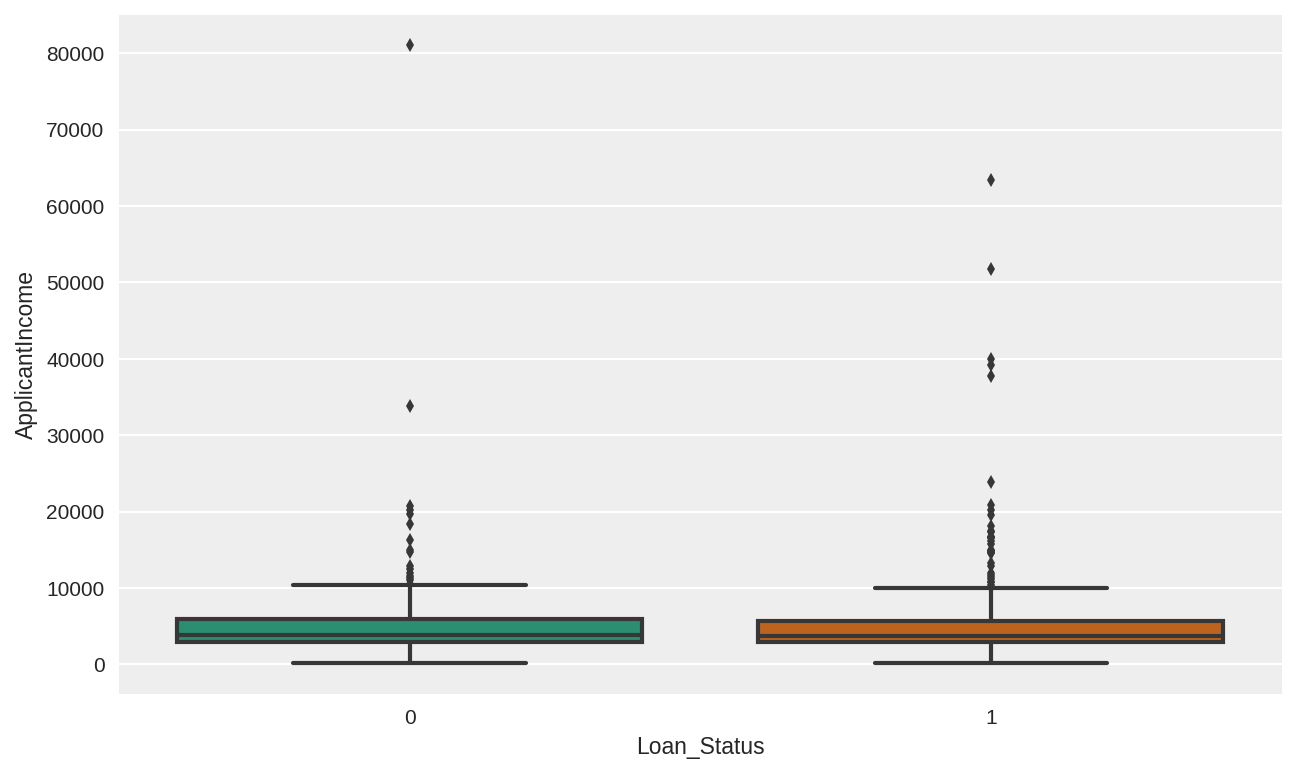

In [609]:
sns.boxplot(x = 'Loan_Status',y = 'ApplicantIncome',data = train,orient='v')

#### Almost similar boxplots hence maybe applicant income is not an informative feature

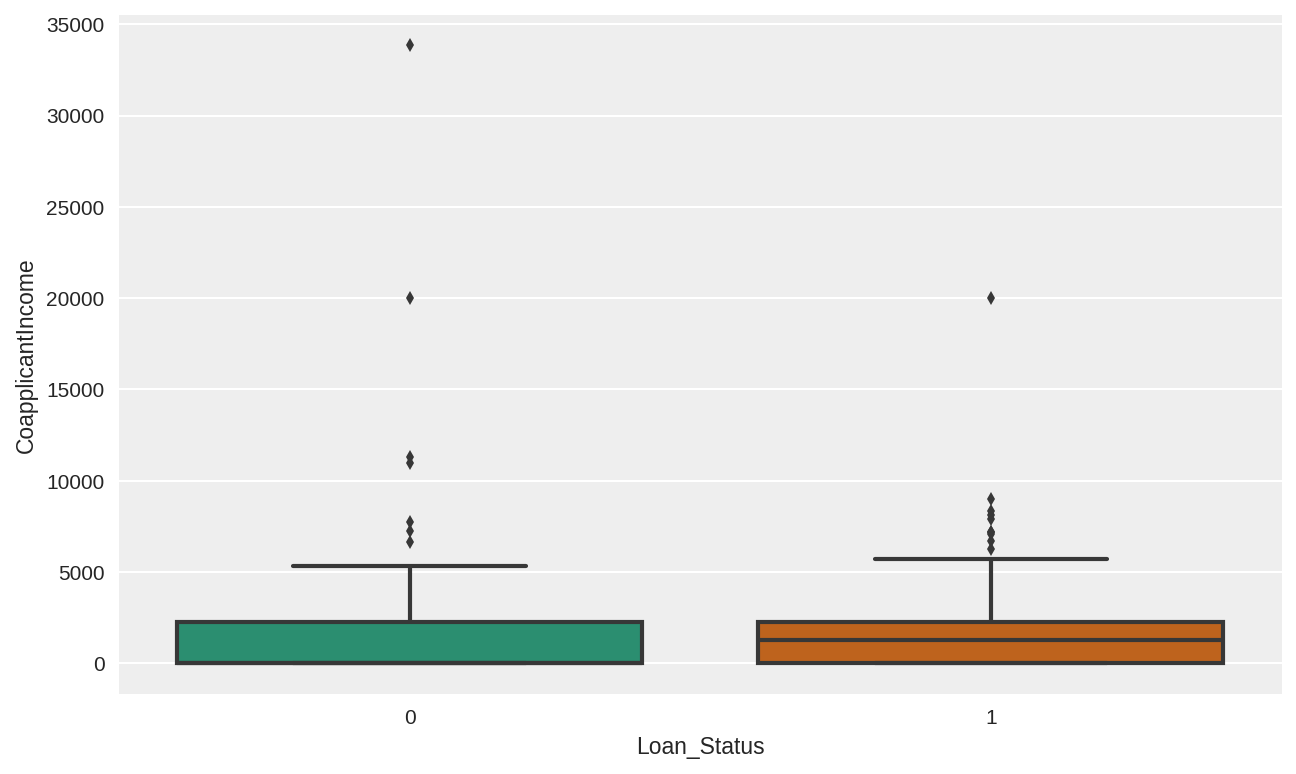

In [610]:
sns.boxplot(x = 'Loan_Status',y = 'CoapplicantIncome',data = train,orient='v')

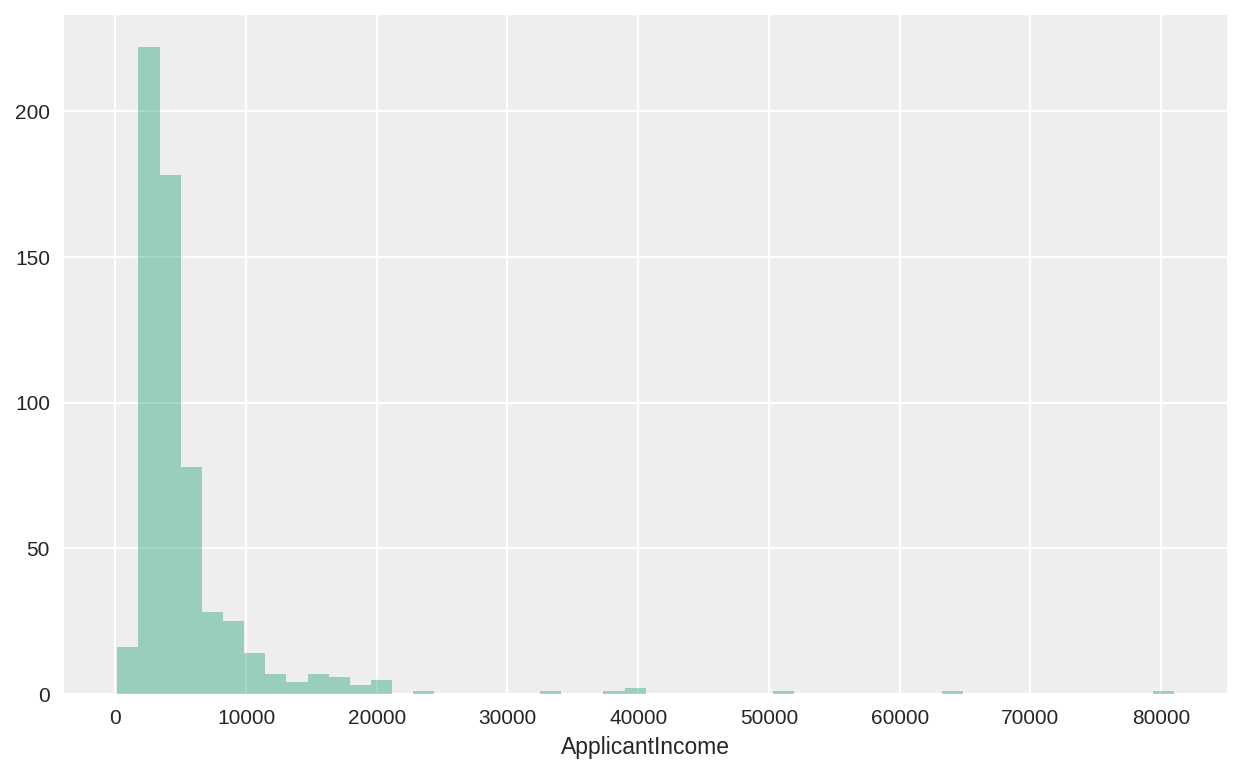

In [612]:
sns.distplot(train.ApplicantIncome,kde=False)

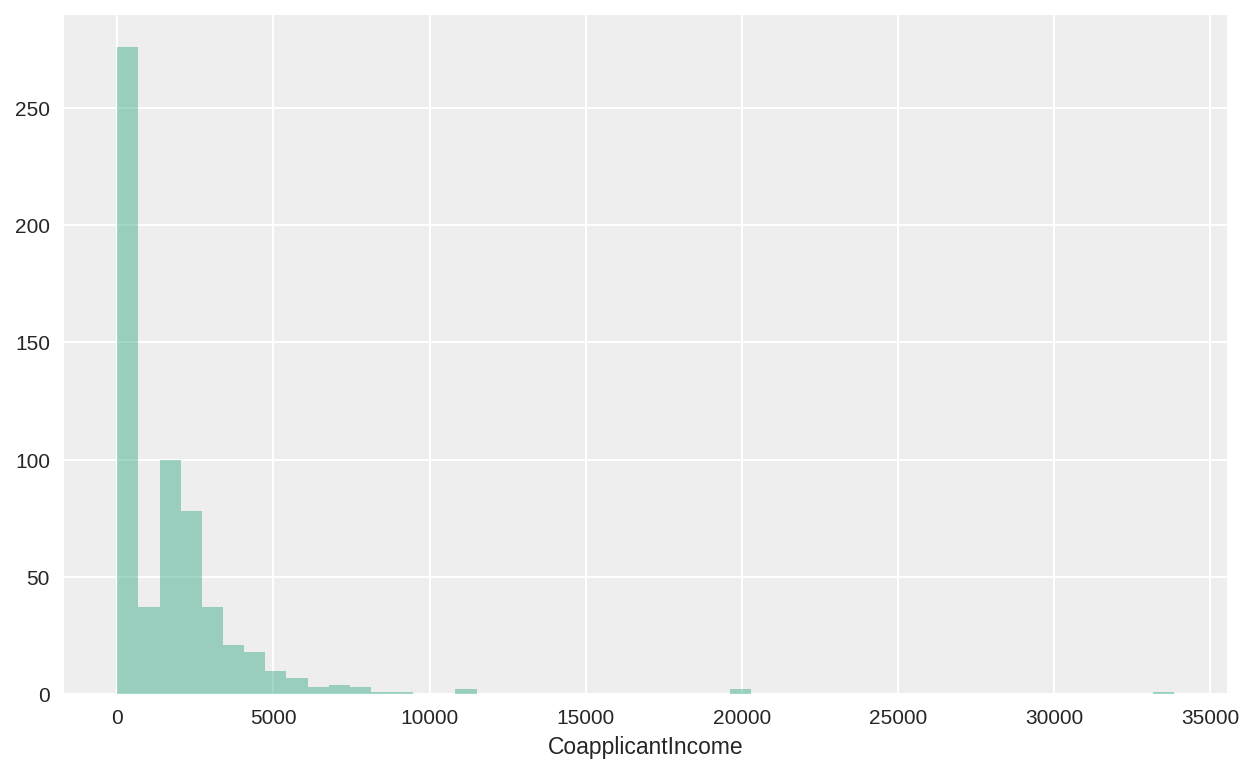

In [613]:
sns.distplot(train.CoapplicantIncome,kde=False)

In [614]:
train.groupby('Loan_Status').median().CoapplicantIncome

Loan_Status
0       0.0
1    1255.0
Name: CoapplicantIncome, dtype: float64

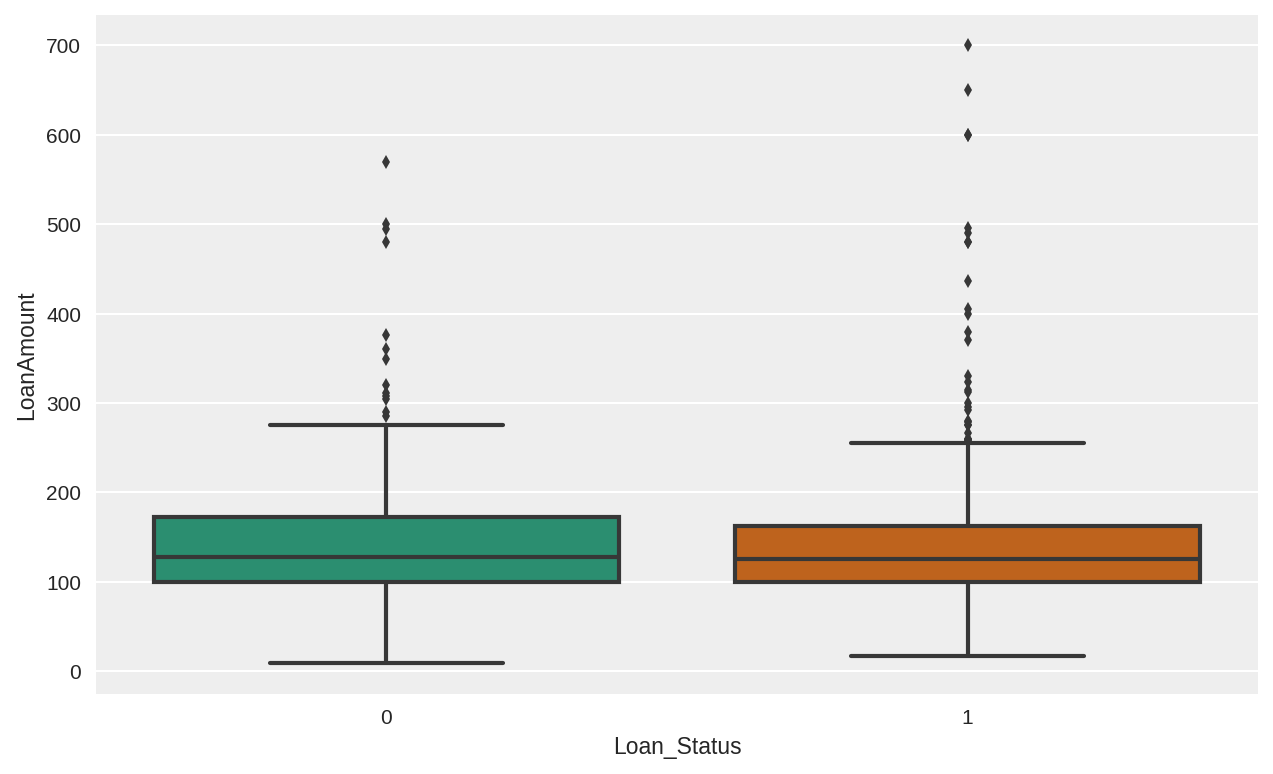

In [615]:
sns.boxplot(train.Loan_Status,train.LoanAmount)

# Missing Value Treatment

In [616]:
train.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,589.000000,601.000000,591.000000,601.000000,576.000000,601.000000,601.000000,582.000000,589.000000,558.000000,601.000000,601.000000
mean,0.813243,0.648918,0.764805,0.777038,0.138889,5404.632280,1555.169584,145.869416,341.969440,0.840502,1.024958,0.688852
std,0.390048,0.477706,1.015397,0.416580,0.346131,6155.485943,2450.745633,85.681053,64.968274,0.366469,0.788063,0.463349
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2876.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3775.000000,1210.000000,127.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5780.000000,2254.000000,167.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [617]:
#dependents
train.Dependents.value_counts()

0.0    340
2.0    101
1.0    100
3.0     50
Name: Dependents, dtype: int64

In [618]:
train.Dependents = train.Dependents.fillna(0.0)
train.Dependents.value_counts()

0.0    350
2.0    101
1.0    100
3.0     50
Name: Dependents, dtype: int64

In [619]:
#Gender
train.Gender.value_counts()

1.0    479
0.0    110
Name: Gender, dtype: int64

In [620]:
train.Gender = train.Gender.fillna(1.0)
train.Gender.value_counts()

1.0    491
0.0    110
Name: Gender, dtype: int64

In [621]:
#loan Amount
train.LoanAmount.describe()

count    582.000000
mean     145.869416
std       85.681053
min        9.000000
25%      100.000000
50%      127.000000
75%      167.750000
max      700.000000
Name: LoanAmount, dtype: float64

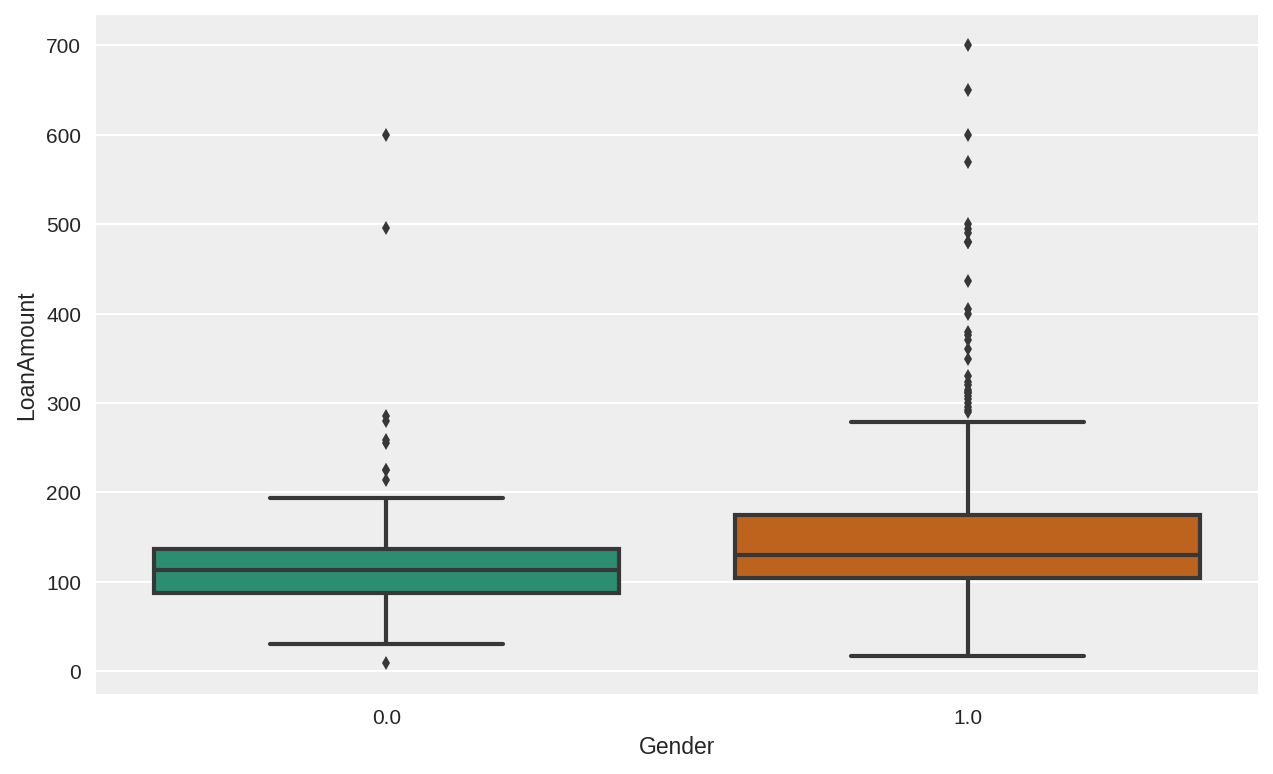

In [622]:
sns.boxplot(train.Gender,train.LoanAmount)

#### Missing value imputation with gender wise median

In [623]:
print train.groupby('Gender').median().LoanAmount[0]
print train.groupby('Gender').median().LoanAmount[1]

113.0
130.0


In [624]:
train.LoanAmount.count()

582

In [625]:
index = train.LoanAmount.index[train.LoanAmount.apply(np.isnan)]
print index

Int64Index([  0,  35,  63,  81, 103, 113, 127, 202, 284, 305, 322, 338, 387,
            437, 479, 524, 550, 551, 605],
           dtype='int64')


In [626]:
for i in index:
    if train.Gender[i] == 0:
        train.LoanAmount[i] = train.groupby('Gender').median().LoanAmount[0]
    else:
        train.LoanAmount[i] = train.groupby('Gender').median().LoanAmount[1]
print train.LoanAmount.count()

/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


601


In [627]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,130.0,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [628]:
train.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [629]:
train.Self_Employed.value_counts()

0.0    496
1.0     80
Name: Self_Employed, dtype: int64

In [631]:
train.groupby('Self_Employed').median().ApplicantIncome

Self_Employed
0.0    3691.5
1.0    5909.0
Name: ApplicantIncome, dtype: float64

In [632]:
train.groupby('Self_Employed').median().CoapplicantIncome

Self_Employed
0.0    1316.0
1.0       0.0
Name: CoapplicantIncome, dtype: float64

In [633]:
fire = train.Self_Employed.index[train.Self_Employed.apply(np.isnan)]
print fire
print fire.size

Int64Index([ 11,  29, 107, 111, 114, 158, 170, 218, 231, 268, 295, 333, 336,
            344, 374, 380, 385, 432, 447, 463, 468, 535, 542, 579, 601],
           dtype='int64')
25


In [634]:
train.Self_Employed.value_counts()

0.0    496
1.0     80
Name: Self_Employed, dtype: int64

In [635]:
train.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [636]:
impute_train = train[train.Self_Employed.notnull()]
impute_test = train[train.Self_Employed.isnull()]
print impute_train.shape
print impute_test.shape
print train.shape

(576, 13)
(25, 13)
(601, 13)


In [637]:
impute_train.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [638]:
imputing_features = impute_train[['Gender','Married','Dependents','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Property_Area','Loan_Status']].values
imputing_target = impute_train['Self_Employed'].values

In [639]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf2 =  RandomForestClassifier(n_estimators = 20,oob_score = True, n_jobs = -1, random_state = 50, max_features = "sqrt", min_samples_leaf = 5)

In [640]:
imputing_test_features = impute_test[['Gender','Married','Dependents','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Property_Area','Loan_Status']].values

In [641]:
rf2.fit(imputing_features,imputing_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=-1, oob_score=True, random_state=50,
            verbose=0, warm_start=False)

In [642]:
impute_predict = rf2.predict(imputing_test_features)
impute_predict.size

25

In [643]:
print impute_predict
#lololol

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [644]:
type(impute_predict)

numpy.ndarray

In [645]:
train.Self_Employed.isnull().any()

True

In [646]:
type(fire)

pandas.indexes.numeric.Int64Index

In [647]:
j=0
for i in fire:
    train.Self_Employed[i] = impute_predict[j]
    j = j+1

/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [648]:
print j

25


In [649]:
train.Self_Employed.isnull().any()

False

In [650]:
train.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [651]:
#Credit History
fire = train.Credit_History.index[train.Credit_History.apply(np.isnan)]
print fire

Int64Index([ 16,  42,  79,  83,  86, 117, 125, 129, 130, 156, 181, 187, 198,
            219, 237, 259, 260, 279, 309, 313, 317, 318, 323, 348, 363, 377,
            392, 395, 444, 449, 451, 473, 490, 491, 497, 503, 506, 530, 533,
            544, 556, 565, 583],
           dtype='int64')


In [652]:
fire.size

43

In [653]:
impute_train = train[train.Credit_History.notnull()]
impute_test = train[train.Credit_History.isnull()]

In [654]:
imputing_features = impute_train[['Gender','Married','Dependents','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Property_Area','Loan_Status','Self_Employed']].values
imputing_target = impute_train['Credit_History'].values

In [655]:
imputing_test_features = impute_test[['Gender','Married','Dependents','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Property_Area','Loan_Status','Self_Employed']].values

In [656]:
rf2.fit(imputing_features,imputing_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=-1, oob_score=True, random_state=50,
            verbose=0, warm_start=False)

In [657]:
impute_predict = rf2.predict(imputing_test_features)

In [658]:
print impute_predict

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  1.  1.]


In [659]:
j = 0
for i in fire:
    train.Credit_History[i] = impute_predict[j]
    j = j+1

/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [660]:
train.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

## Test Dataframe 

In [661]:
#Property_Area
test.loc[test.Property_Area == "Rural","Property_Area"] = 0
test.loc[test.Property_Area == "Semiurban","Property_Area"] = 1
test.loc[test.Property_Area == "Urban","Property_Area"] = 2

#Education
test.loc[test.Education == "Not Graduate","Education"] = 0
test.loc[test.Education == "Graduate","Education"] = 1

#Gender
test.loc[test.Gender == "Female","Gender"] = 0
test.loc[test.Gender == "Male","Gender"] = 1

#self-emloyed
test.loc[test.Self_Employed == "No","Self_Employed"] = 0
test.loc[test.Self_Employed == "Yes","Self_Employed"] = 1

#Married?
test.loc[test.Married == "No","Married"] = 0
test.loc[test.Married == "Yes","Married"] = 1

#Dependents
test.loc[test.Dependents == "0","Dependents"] = 0
test.loc[test.Dependents == "1","Dependents"] = 1
test.loc[test.Dependents == "2","Dependents"] = 2
test.loc[test.Dependents == "3+","Dependents"] = 3

test[['Gender','Married','Education','Self_Employed','Dependents','Property_Area']] = test[['Gender','Married','Education','Self_Employed','Dependents','Property_Area']].apply(pd.to_numeric)        

In [662]:
test.dtypes

Loan_ID               object
Gender               float64
Married                int64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [663]:
test.isnull().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [665]:
####   MISSING VALUE TREATMENT   ####

#dependents
test.Dependents = test.Dependents.fillna(0.0)
test.Dependents.value_counts()

#Gender
test.Gender = test.Gender.fillna(1.0)
test.Gender.value_counts()

1.0    297
0.0     70
Name: Gender, dtype: int64

In [666]:
#loan Amount
index = test.LoanAmount.index[test.LoanAmount.apply(np.isnan)]
print index

Int64Index([78, 101, 188, 247, 289], dtype='int64')


In [667]:
for i in index:
    if test.Gender[i] == 0:
        test.LoanAmount[i] = test.groupby('Gender').median().LoanAmount[0]
    else:
        test.LoanAmount[i] = test.groupby('Gender').median().LoanAmount[1]
print test.LoanAmount.count()

/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


367


In [668]:
test.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [669]:
foam = test.Self_Employed.index[test.Self_Employed.apply(np.isnan)]
print foam

Int64Index([  8,  11,  13,  36,  72,  89, 142, 161, 168, 175, 192, 243, 255,
            259, 276, 278, 285, 287, 294, 297, 301, 323, 326],
           dtype='int64')


In [670]:
test.Self_Employed = test.Self_Employed.fillna(0)
test.Credit_History = test.Credit_History.fillna(1)

In [671]:
test.shape

(367, 12)

In [672]:
test.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History       False
Property_Area        False
dtype: bool

## Finally Predicting Benchmark

In [673]:
features = train[['Gender','Married','Dependents','Education','CoapplicantIncome','LoanAmount','Property_Area','Credit_History','Self_Employed']].values
target = train['Loan_Status'].values

In [674]:
test_features = test[['Gender','Married','Dependents','Education','CoapplicantIncome','LoanAmount','Property_Area','Credit_History','Self_Employed']].values

In [675]:
rf3 = RandomForestClassifier(n_estimators = 200,max_features = "sqrt", min_samples_leaf = 10)

In [676]:
rf3_scores = cross_val_score(rf3,features,target,cv = 10,scoring = "accuracy")
print rf3_scores.mean()

0.817186255441


In [677]:
rf3.fit(features,target)
y_pred = rf3.predict(test_features)
pd.Series(y_pred).value_counts(normalize=True)

1    0.839237
0    0.160763
dtype: float64

In [678]:
from sklearn import svm
clf = svm.SVC()

In [679]:
svm_scores = cross_val_score(clf,features,target,cv = 10,scoring = "accuracy")
print svm_scores.mean()

0.704023802908


In [680]:
clf.fit(features,target)
y_pred2 = clf.predict(test_features)
pd.Series(y_pred2).value_counts(normalize=True)

1    0.959128
0    0.040872
dtype: float64

In [681]:
output = pd.DataFrame(test)
output.drop(output.columns[1:],axis =1,inplace = True)
output.head()

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051


In [682]:
output['Loan_Status'] = pd.Series(y_pred)

In [683]:
output.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [684]:
output.loc[output.Loan_Status == 1,'Loan_Status'] = "Y"
output.loc[output.Loan_Status == 0,'Loan_Status'] = "N"

In [685]:
output.Loan_Status.dtype

dtype('O')

In [686]:
output.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [687]:
print output.Loan_Status.value_counts(normalize=True)
print train.Loan_Status.value_counts(normalize=True)

Y    0.839237
N    0.160763
Name: Loan_Status, dtype: float64
1    0.688852
0    0.311148
Name: Loan_Status, dtype: float64


In [690]:
output.to_csv('loan-pred-bm.csv',index = False)